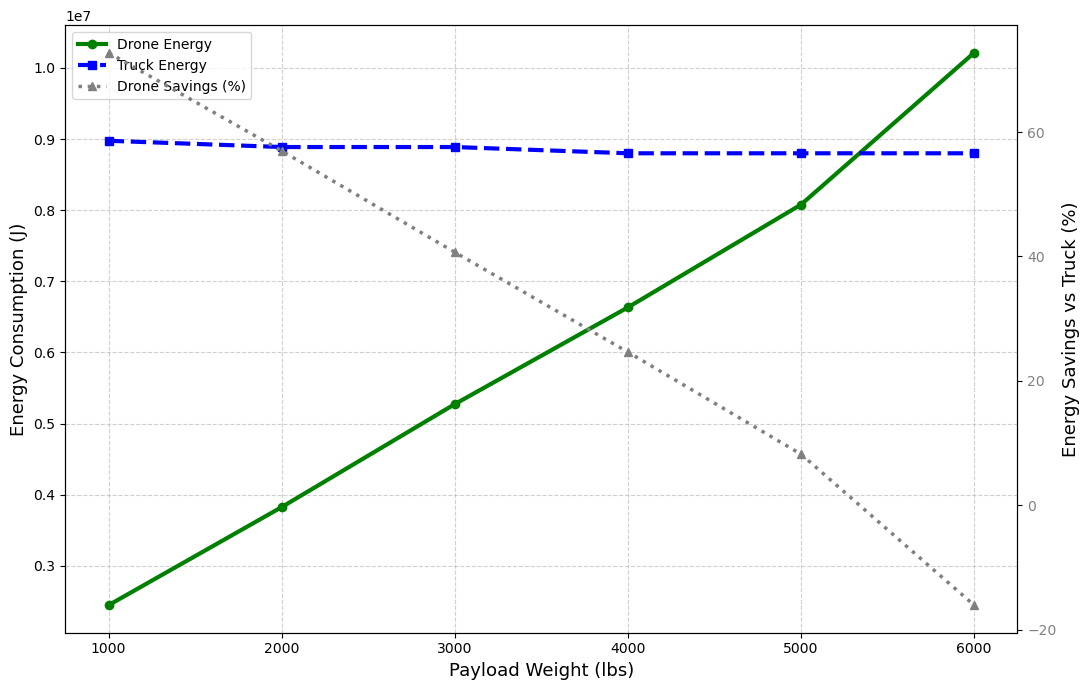

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the energy data
energy_data = {
    "Total Weight (lbs)": [1000, 2000, 3000, 4000, 5000, 6000],
    "Drone (J)": [2446432.5, 3825252.6, 5272993.0, 6633161.4, 8078182.6, 10213343.0],
    "Truck (J)": [8976000.0, 8888000.0, 8888000.0, 8800000.0, 8800000.0, 8800000.0]
}

df_energy = pd.DataFrame(energy_data)

# Compute energy savings percentage
df_energy["% Savings (Drone vs Truck)"] = 100 * (df_energy["Truck (J)"] - df_energy["Drone (J)"]) / df_energy["Truck (J)"]

# Create the energy plot with dual axis
fig, ax1 = plt.subplots(figsize=(11, 7))

# Primary axis: Energy consumption
ax1.plot(df_energy["Total Weight (lbs)"], df_energy["Drone (J)"],
         marker='o', linestyle='-', color='green', label='Drone Energy', linewidth=3)
ax1.plot(df_energy["Total Weight (lbs)"], df_energy["Truck (J)"],
         marker='s', linestyle='--', color='blue', label='Truck Energy', linewidth=3)

ax1.set_xlabel("Payload Weight (lbs)", fontsize=13)
ax1.set_ylabel("Energy Consumption (J)", fontsize=13)
ax1.tick_params(axis='y')
ax1.grid(True, linestyle='--', alpha=0.6)

# Secondary axis: % Savings
ax2 = ax1.twinx()
ax2.plot(df_energy["Total Weight (lbs)"], df_energy["% Savings (Drone vs Truck)"],
         color='gray', linestyle=':', marker='^', linewidth=2.5, label='Drone Savings (%)')
ax2.set_ylabel("Energy Savings vs Truck (%)", fontsize=13)
ax2.tick_params(axis='y', labelcolor='gray')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
fig.tight_layout()
plt.savefig("energy_consumptions", dpi=300)
plt.show()



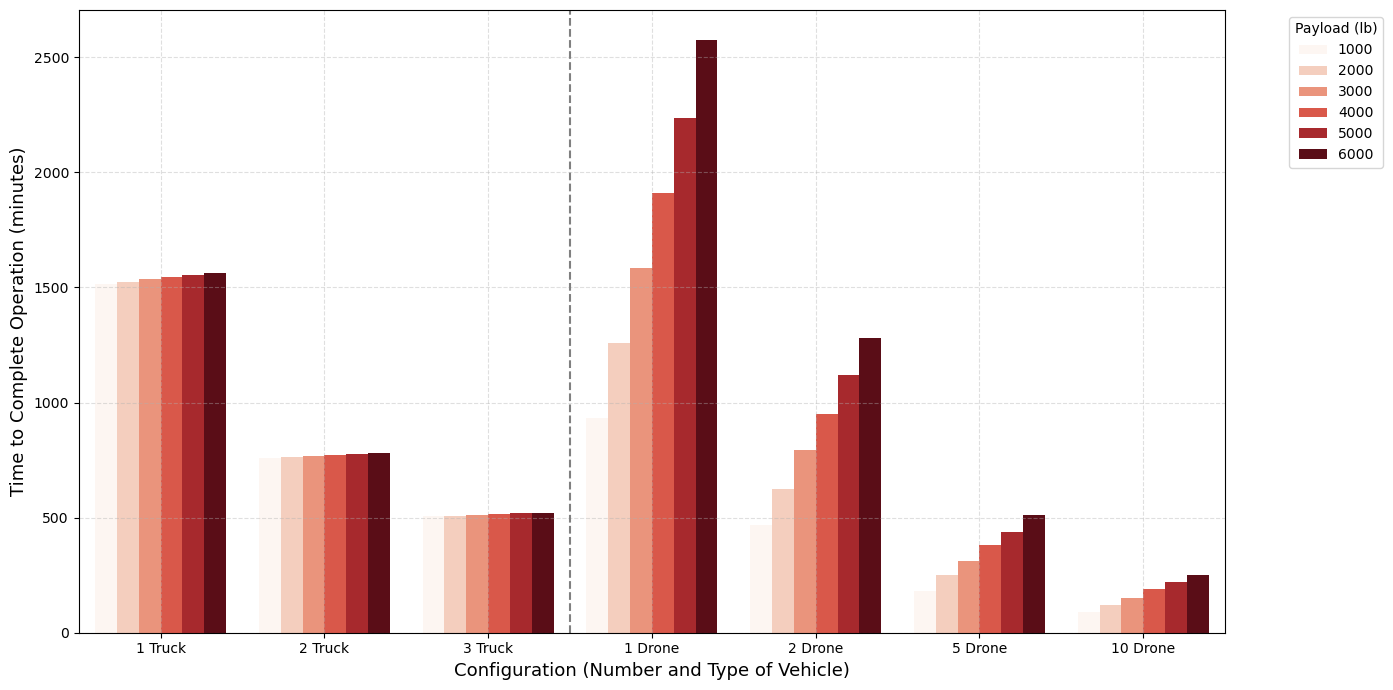

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# --- Sample melted data setup (use your actual df_melted if defined) ---
data = {
    "Weight (lb)": [1000, 2000, 3000, 4000, 5000, 6000],
    "1 Truck": [1515.0715, 1525.0218, 1535.0218, 1544.972, 1554.972, 1564.972],
    "2 Trucks": [757.53574, 762.51088, 767.51088, 772.48602, 777.48602, 782.48602],
    "3 Trucks": [505.023824, 508.340584, 511.673918, 514.990677, 518.324011, 521.657344],
    "1 Drone": [934.967343, 1259.69276, 1585.85402, 1910.19086, 2236.29547, 2576.77798],
    "2 Drones": [467.483672, 623.846381, 792.927011, 949.095432, 1118.14774, 1282.38899],
    "5 Drones": [182.1935, 251.9386, 309.9708, 379.6382, 437.6591, 510.5556],
    "10 Drones": [91.09673, 119.9693, 148.9854, 189.8191, 218.8295, 249.2778]
}

# Convert to long format
df = pd.DataFrame(data)
df_melted = df.melt(id_vars="Weight (lb)", var_name="Configuration", value_name="Time (min)")
df_melted["Mode"] = df_melted["Configuration"].apply(lambda x: "Truck" if "Truck" in x else "Drone")

# --- Plotting Data Prep ---
df_bar = df_melted.copy()
df_bar["# Vehicles"] = df_bar["Configuration"].str.extract("(\d+)").astype(int)
df_bar["Vehicle Type"] = df_bar["Mode"]
df_bar["Config Label"] = df_bar["# Vehicles"].astype(str) + " " + df_bar["Vehicle Type"]

# Sort config labels manually
config_order = ["1 Truck", "2 Truck", "3 Truck", "1 Drone", "2 Drone", "5 Drone", "10 Drone"]
df_bar["Config Label"] = pd.Categorical(df_bar["Config Label"], categories=config_order, ordered=True)

# Red gradient for payload weights
weights = sorted(df_bar["Weight (lb)"].unique())
norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
red_cmap = plt.cm.Reds
palette = {weight: red_cmap(norm(weight)) for weight in weights}

# --- Plot ---
plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_bar,
    x="Config Label",
    y="Time (min)",
    hue="Weight (lb)",
    palette=palette,
    hue_order=weights
)

# Vertical split between trucks and drones
plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel("Configuration (Number and Type of Vehicle)", fontsize=13)
plt.ylabel("Time to Complete Operation (minutes)", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Payload (lb)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("operation_time_by_config.png", dpi=300)

plt.show()



In [34]:
## Extra Graph, similar to the above

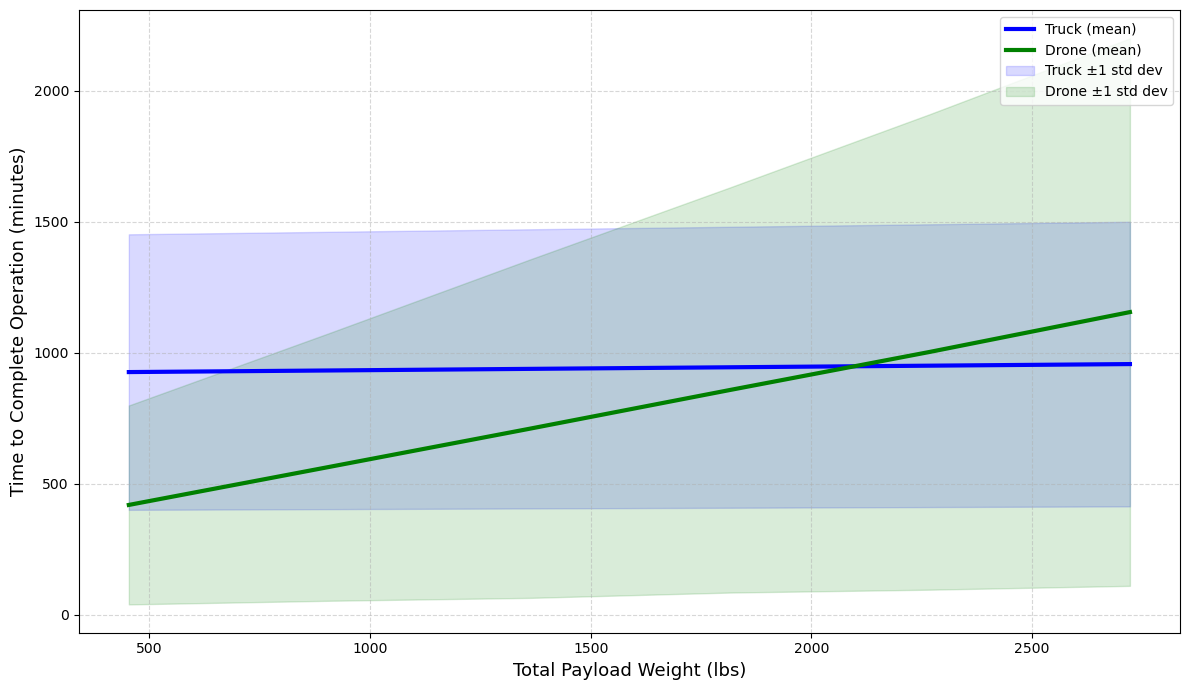

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Define the data ---
data = {
    "Weight (lb)": [1000, 2000, 3000, 4000, 5000, 6000],
    "1 Truck": [1515.0715, 1525.0218, 1535.0218, 1544.972, 1554.972, 1564.972],
    "2 Trucks": [757.53574, 762.51088, 767.51088, 772.48602, 777.48602, 782.48602],
    "3 Trucks": [505.023824, 508.340584, 511.673918, 514.990677, 518.324011, 521.657344],
    "1 Drone": [934.967343, 1259.69276, 1585.85402, 1910.19086, 2236.29547, 2576.77798],
    "2 Drones": [467.483672, 623.846381, 792.927011, 949.095432, 1118.14774, 1282.38899],
    "5 Drones": [182.1935, 251.9386, 309.9708, 379.6382, 437.6591, 510.5556],
    "10 Drones": [91.09673, 119.9693, 148.9854, 189.8191, 218.8295, 249.2778]
}

# --- Step 2: Create DataFrame and convert weight to kg ---
df = pd.DataFrame(data)
df["Weight (kg)"] = df["Weight (lb)"] * 0.453592  # conversion factor
df = df.set_index("Weight (kg)")

# --- Step 3: Separate into truck and drone configurations ---
truck_cols = ["1 Truck", "2 Trucks", "3 Trucks"]
drone_cols = ["1 Drone", "2 Drones", "5 Drones", "10 Drones"]

truck_df = df[truck_cols]
drone_df = df[drone_cols]

# --- Step 4: Compute mean and std across configurations ---
truck_mean = pd.to_numeric(truck_df.mean(axis=1))
truck_std = pd.to_numeric(truck_df.std(axis=1))

drone_mean = pd.to_numeric(drone_df.mean(axis=1))
drone_std = pd.to_numeric(drone_df.std(axis=1))

# --- Step 5: Prepare arrays for plotting ---
x_truck = truck_mean.index.to_numpy(dtype='float64')
x_drone = drone_mean.index.to_numpy(dtype='float64')

truck_mean_vals = truck_mean.to_numpy(dtype='float64')
truck_std_vals = truck_std.to_numpy(dtype='float64')
drone_mean_vals = drone_mean.to_numpy(dtype='float64')
drone_std_vals = drone_std.to_numpy(dtype='float64')

# --- Step 6: Plot ---
plt.figure(figsize=(12, 7))

# Mean lines
plt.plot(x_truck, truck_mean_vals, label='Truck (mean)', color='blue', linewidth=3)
plt.plot(x_drone, drone_mean_vals, label='Drone (mean)', color='green', linewidth=3)

# Shaded regions (±1 std dev)
plt.fill_between(x_truck, truck_mean_vals - truck_std_vals, truck_mean_vals + truck_std_vals, 
                 color='blue', alpha=0.15, label='Truck ±1 std dev')
plt.fill_between(x_drone, drone_mean_vals - drone_std_vals, drone_mean_vals + drone_std_vals, 
                 color='green', alpha=0.15, label='Drone ±1 std dev')

# Formatting
plt.xlabel("Total Payload Weight (lbs)", fontsize=13)
plt.ylabel("Time to Complete Operation (minutes)", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()

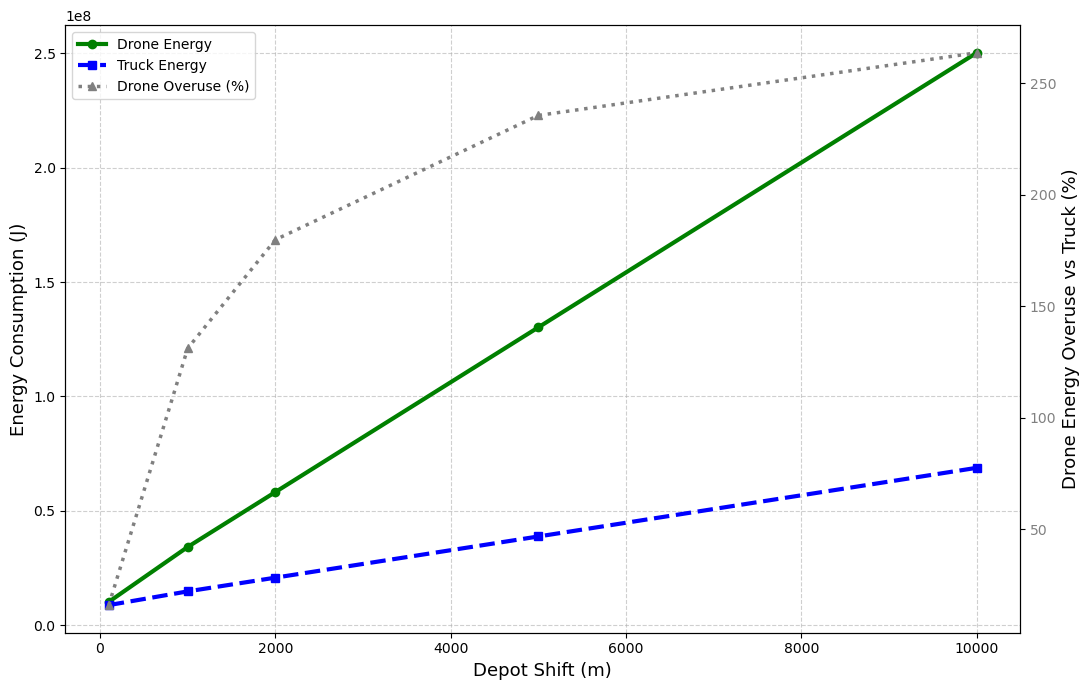

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Define energy data
energy_data = {
    "Depot Shift (m)": [100, 1000, 2000, 5000, 10000],
    "Truck (J)": [8800000, 14800000, 20800000, 38800000, 68800000],
    "Drone (J)": [10213342.99, 34213343, 58213334, 130213343, 250213342]
}

df_energy = pd.DataFrame(energy_data)

# Compute % overuse of drone vs truck
df_energy["% Overuse (Drone vs Truck)"] = 100 * (df_energy["Drone (J)"] - df_energy["Truck (J)"]) / df_energy["Truck (J)"]

# Plot
fig, ax1 = plt.subplots(figsize=(11, 7))

# Primary axis: Energy
ax1.plot(df_energy["Depot Shift (m)"], df_energy["Drone (J)"],
         marker='o', linestyle='-', color='green', label='Drone Energy', linewidth=3)
ax1.plot(df_energy["Depot Shift (m)"], df_energy["Truck (J)"],
         marker='s', linestyle='--', color='blue', label='Truck Energy', linewidth=3)

ax1.set_xlabel("Depot Shift (m)", fontsize=13)
ax1.set_ylabel("Energy Consumption (J)", fontsize=13)
ax1.grid(True, linestyle='--', alpha=0.6)

# Secondary axis: % Overuse
ax2 = ax1.twinx()
ax2.plot(df_energy["Depot Shift (m)"], df_energy["% Overuse (Drone vs Truck)"],
         color='gray', linestyle=':', marker='^', linewidth=2.5, label='Drone Overuse (%)')
ax2.set_ylabel("Drone Energy Overuse vs Truck (%)", fontsize=13)
ax2.tick_params(axis='y', labelcolor='gray')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Finalize plot
fig.tight_layout()
plt.savefig("energy_vs_depot_shift.png", dpi=300)
plt.show()

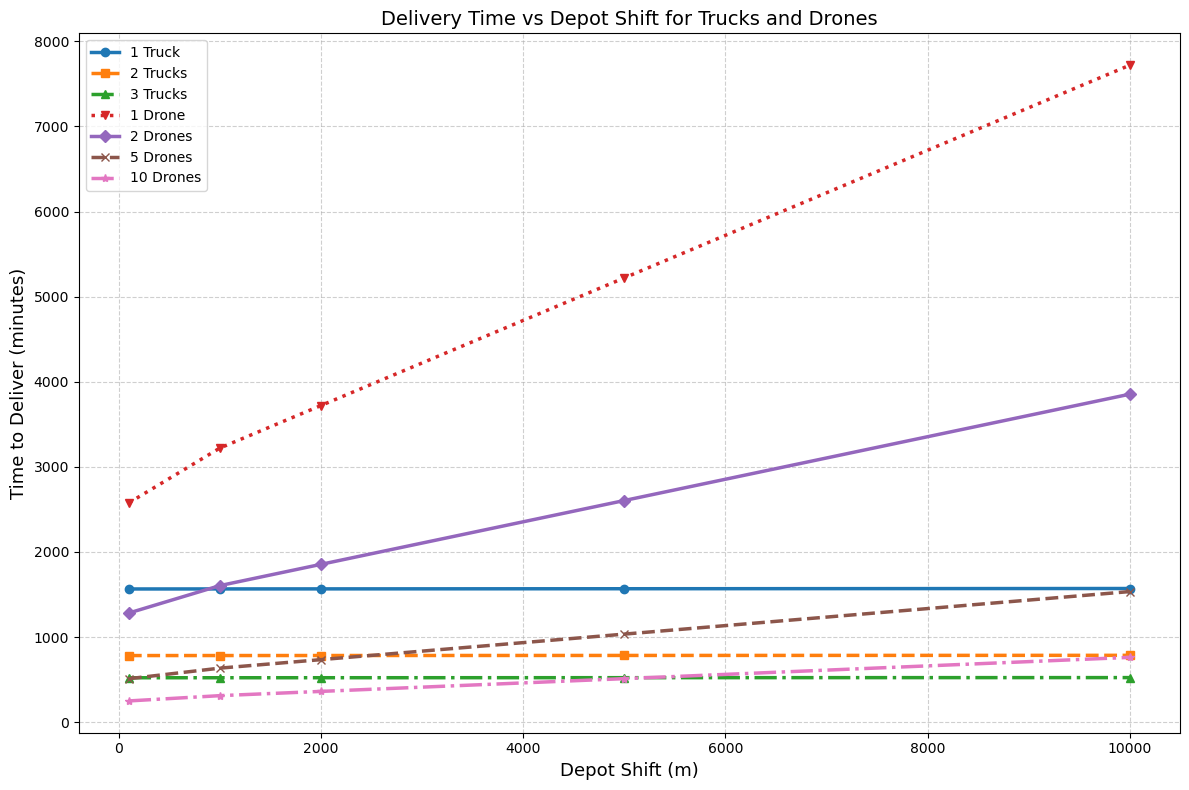

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Define time data
time_data = {
    "Depot Shift (m)": [100, 1000, 2000, 5000, 10000],
    "1 Truck": [1564.972032, 1565.520893, 1566.069754, 1567.716336, 1570.460639],
    "2 Trucks": [782.4860162, 782.7604465, 783.0348769, 783.8581679, 785.2303197],
    "3 Trucks": [521.6573441, 521.8402977, 522.0232512, 522.572112, 523.4868798],
    "1 Drone": [2576.77798, 3220.77798, 3720.77779, 5220.77798, 7720.77796],
    "2 Drones": [1282.389, 1604.389, 1854.3889, 2604.389, 3854.389],
    "5 Drones": [510.5556, 634.5556, 734.55556, 1034.5556, 1534.5556],
    "10 Drones": [249.2778, 311.2778, 361.27778, 511.2778, 761.2778]
}

df_time = pd.DataFrame(time_data)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

line_styles = ['-', '--', '-.', ':', '-', '--', '-.']
markers = ['o', 's', '^', 'v', 'D', 'x', '*']

for i, column in enumerate(df_time.columns[1:]):
    ax.plot(df_time["Depot Shift (m)"], df_time[column],
            marker=markers[i % len(markers)],
            linestyle=line_styles[i % len(line_styles)],
            linewidth=2.5, label=column)

ax.set_xlabel("Depot Shift (m)", fontsize=13)
ax.set_ylabel("Time to Deliver (minutes)", fontsize=13)
ax.set_title("Delivery Time vs Depot Shift for Trucks and Drones", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc="upper left")
fig.tight_layout()
plt.savefig("time_vs_depot_shift.png", dpi=300)
plt.show()